<hr>

***Version: 1001.1592024.qut.cs.tnl***

***Sk Tanzir Mehedi, PhD Student, QUT***

***Supervisory Team: Prof. Raja Jurdak & Dr Chadni Islam***
<hr>

**----Start of Step 3 Analysis----**

In [1]:
import pandas as pd

file_path = 'MaliciousPackagesDetailsFromDifferentWebsites_REST.csv'
data = pd.read_csv(file_path)
data.head()

,Malicious Package Name,Malicious Package Version,Language,Package Manager,Vulnerable SemVer Range,Vulnerability ID,Title,Vulnerability Type,Effective Severity Level,Severity,...,Disclosure Time,Publication Time,Remedy Type,Remedy Description,Upgrade Package,Reference Titles,Description,Reference URLs,Problems,Data Found/Reason
0,10Cent10,999.0.4,Python,pypi,"[0,]",SNYK-PYTHON-10CENT10-1924473,Malicious Package,package_vulnerability,critical,critical,...,2021-11-19T12:00:00Z,2021-11-21T11:30:28.489126Z,indeterminate,Upgrade the package version to to fix this vu...,NaN,JFrog Writeup,## Overview [10Cent10](https://pypi.org/projec...,https://jfrog.com/blog/python-malware-imitates...,CWE-506,Data found
1,10Cent11,999.0.4,Python,pypi,"[0,]",SNYK-PYTHON-10CENT11-1924588,Malicious Package,package_vulnerability,critical,critical,...,2021-11-19T12:00:00Z,2021-11-21T11:30:28Z,indeterminate,Upgrade the package version to to fix this vu...,NaN,JFrog Writeup,## Overview [10Cent11](https://pypi.org/projec...,https://jfrog.com/blog/python-malware-imitates...,CWE-506,Data found
2,11cent,999.0.0,Python,pypi,"[0,]",SNYK-PYTHON-11CENT-2864530,Malicious Package,package_vulnerability,critical,critical,...,2022-06-09T12:29:43Z,2022-06-09T12:46:32Z,indeterminate,Upgrade the package version to to fix this vu...,NaN,Medium Blog,## Overview [11Cent](https://pypi.org/project/...,https://bertusk.medium.com/malicious-pypi-pack...,"CWE-506, PVE-2022-47997",Data found
3,11cent,999.0.1,Python,pypi,"[0,]",SNYK-PYTHON-11CENT-2864530,Malicious Package,package_vulnerability,critical,critical,...,2022-06-09T12:29:43Z,2022-06-09T12:46:32Z,indeterminate,Upgrade the package version to to fix this vu...,NaN,Medium Blog,## Overview [11Cent](https://pypi.org/project/...,https://bertusk.medium.com/malicious-pypi-pack...,"CWE-506, PVE-2022-47997",Data found
4,11cent,999.0.2,Python,pypi,"[0,]",SNYK-PYTHON-11CENT-2864530,Malicious Package,package_vulnerability,critical,critical,...,2022-06-09T12:29:43Z,2022-06-09T12:46:32Z,indeterminate,Upgrade the package version to to fix this vu...,NaN,Medium Blog,## Overview [11Cent](https://pypi.org/project/...,https://bertusk.medium.com/malicious-pypi-pack...,"CWE-506, PVE-2022-47997",Data found


In [3]:
count_summary = pd.DataFrame({
    'Column Name': data.columns,
    'Count (Non-Null)': data.count(),
    'Count (Missing)': data.isnull().sum()
})

count_summary['Summary'] = count_summary.apply(
    lambda row: f"{row['Count (Non-Null)']} ({row['Count (Missing)']} missing)" if row['Count (Missing)'] > 0 else f"{row['Count (Non-Null)']} (0)", axis=1
)
count_summary_display = count_summary[['Column Name', 'Summary']]
count_summary_display

,Column Name,Summary
Malicious Package Name,Malicious Package Name,7127 (0)
Malicious Package Version,Malicious Package Version,7127 (0)
Language,Language,5412 (1715 missing)
Package Manager,Package Manager,5412 (1715 missing)
Vulnerable SemVer Range,Vulnerable SemVer Range,5412 (1715 missing)
Vulnerability ID,Vulnerability ID,5412 (1715 missing)
Title,Title,5412 (1715 missing)
Vulnerability Type,Vulnerability Type,5412 (1715 missing)
Effective Severity Level,Effective Severity Level,5412 (1715 missing)
Severity,Severity,5412 (1715 missing)


In [4]:
import matplotlib.pyplot as plt

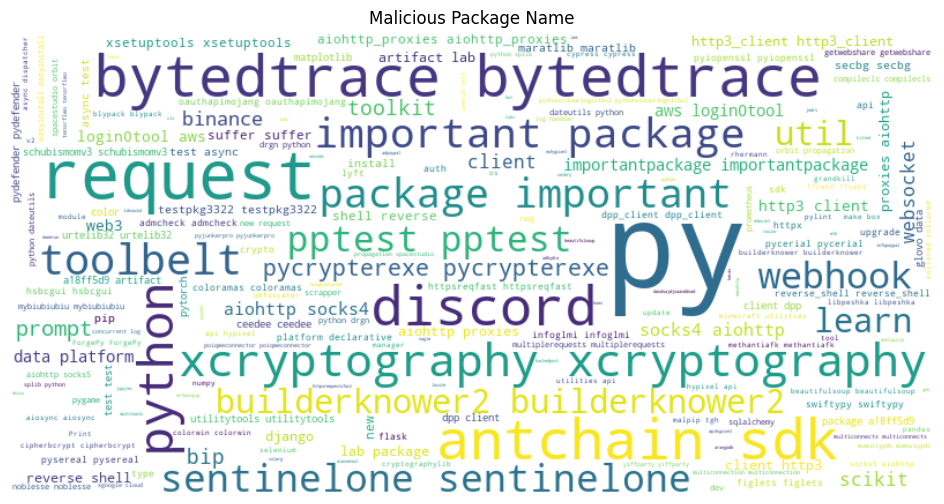

In [45]:
from wordcloud import WordCloud

df_w = ' '.join(data['Malicious Package Name'].dropna())

if df_w:
    wordcloud_desc = WordCloud(width=800, height=400, background_color='white').generate(df_w)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_desc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Malicious Package Name')
    plt.savefig('Summarized Malicious Packages.png', dpi=600)
    plt.show()
else:
    print("No data available.")

<Figure size 1200x800 with 0 Axes>

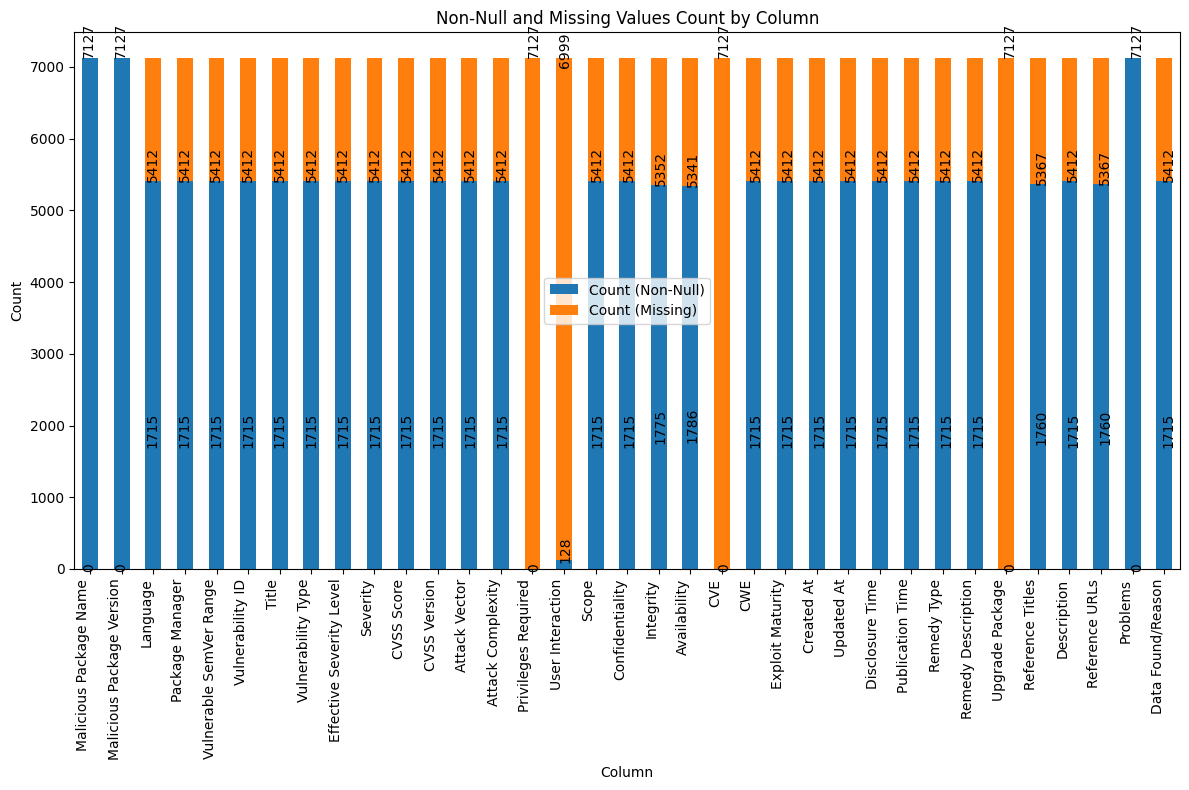

In [5]:
# Summarized Count
plt.figure(figsize=(12, 8))
ax = count_summary.set_index('Column Name')[['Count (Non-Null)', 'Count (Missing)']].plot(kind='bar', stacked=True, figsize=(12, 8))
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() * 1.005, p.get_height() * 1.005), rotation=90)

plt.title('Non-Null and Missing Values Count by Column')
plt.xlabel('Column')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('Summarized count.png', dpi=600)
plt.show()

In [6]:
data['Disclosure Time'] = pd.to_datetime(data['Disclosure Time'], errors='coerce')
data['Publication Time'] = pd.to_datetime(data['Publication Time'], errors='coerce')

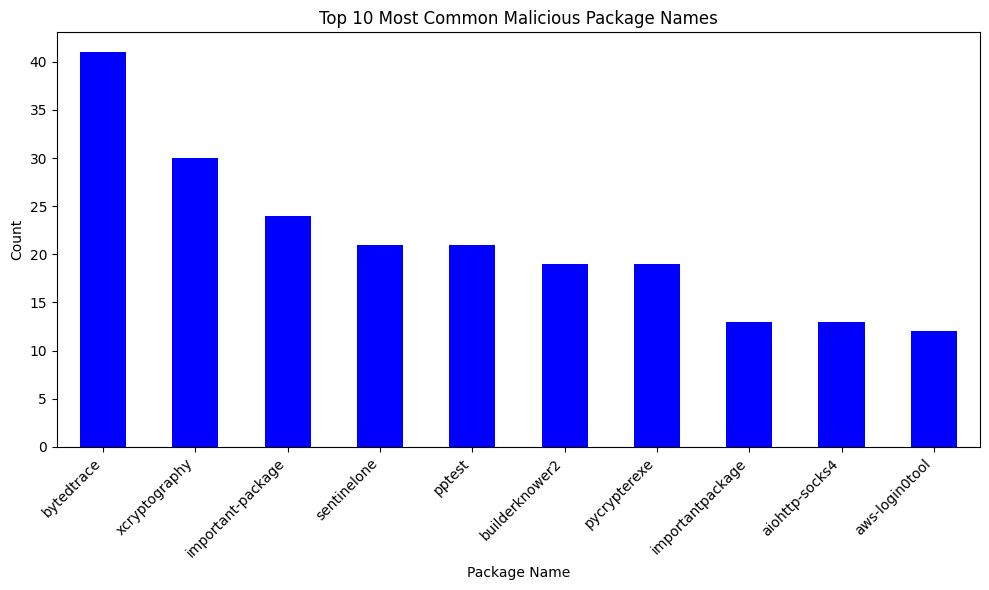

In [33]:
# Graph: Top 10 Most Common Package Names Involved in Vulnerabilities
top_10_packages = data['Malicious Package Name'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_10_packages.plot(kind='bar', color='blue')
plt.title('Top 10 Most Common Malicious Package Names')
plt.xlabel('Package Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Top 10 Most Common Package Names Involved in Vulnerabilities.png', dpi=600)
plt.show()

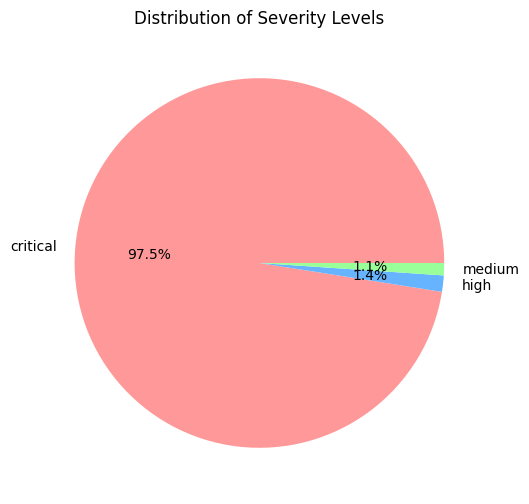

In [28]:
# Graph: Distribution of Severity Levels
severity_distribution = data['Severity'].value_counts()

plt.figure(figsize=(8,6))
severity_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Severity Levels')
plt.ylabel('')  # Hide y-label for pie chart
plt.savefig('Distribution of Severity Levels.png', dpi=600)
plt.show()

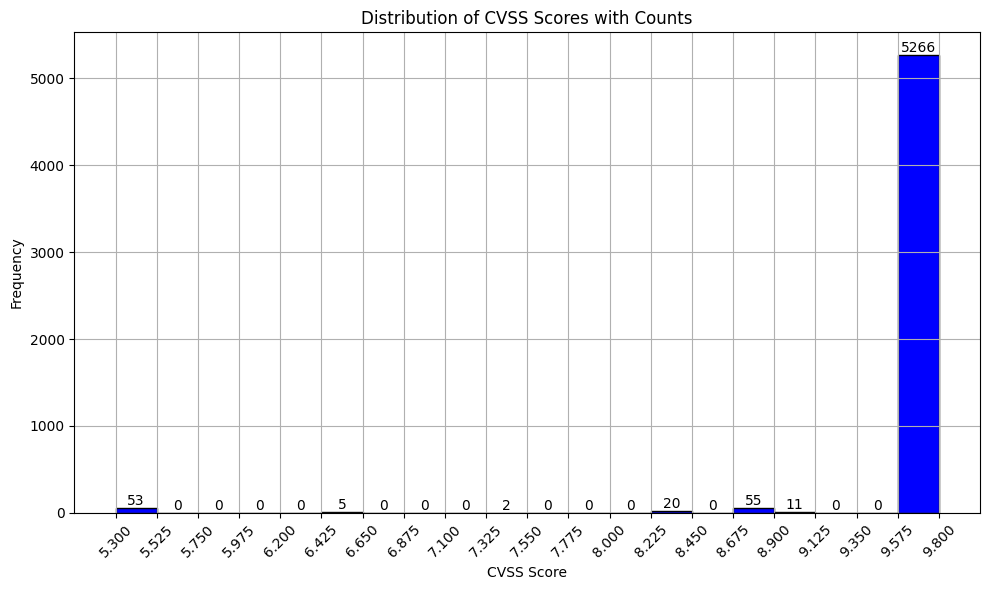

In [31]:
plt.figure(figsize=(10,6))
cvss_scores = data['CVSS Score'].dropna()
counts, bins, patches = plt.hist(cvss_scores, bins=20, color='blue', edgecolor='black')

for count, bin_edge in zip(counts, bins[:-1]):
    plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

plt.title('Distribution of CVSS Scores with Counts')
plt.xlabel('CVSS Score')
plt.ylabel('Frequency')

plt.xticks(bins, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.savefig('Distribution of CVSS Score.png', dpi=600)
plt.show()

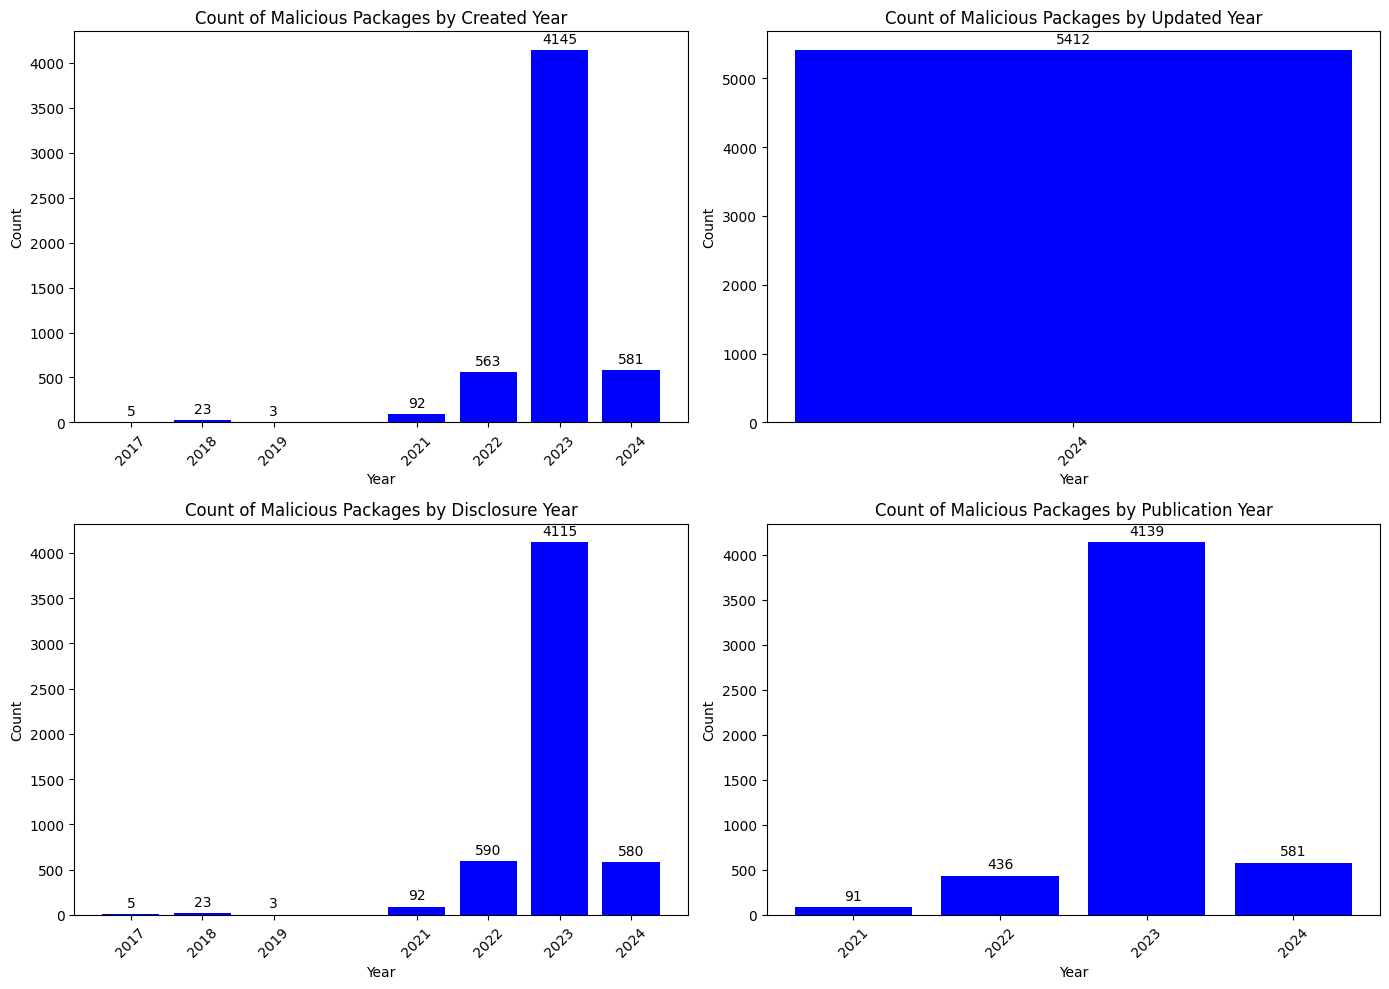

In [32]:
data['Created At'] = pd.to_datetime(data['Created At'], errors='coerce')
data['Updated At'] = pd.to_datetime(data['Updated At'], errors='coerce')
data['Disclosure Time'] = pd.to_datetime(data['Disclosure Time'], errors='coerce')
data['Publication Time'] = pd.to_datetime(data['Publication Time'], errors='coerce')

data['Created Year'] = data['Created At'].dt.year
data['Updated Year'] = data['Updated At'].dt.year
data['Disclosure Year'] = data['Disclosure Time'].dt.year
data['Publication Year'] = data['Publication Time'].dt.year

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

columns_to_plot = ['Created Year', 'Updated Year', 'Disclosure Year', 'Publication Year']
titles = ['Count of Malicious Packages by Created Year', 'Count of Malicious Packages by Updated Year',
          'Count of Malicious Packages by Disclosure Year', 'Count of Malicious Packages by Publication Year']

for ax, col, title in zip(axes.flatten(), columns_to_plot, titles):
    year_count = data[col].value_counts().sort_index()
    bars = ax.bar(year_count.index, year_count.values, color='blue')
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_xticks(year_count.index)
    ax.set_xticklabels(year_count.index.astype(int), rotation=45)
    
    for bar in bars:
        ax.annotate(f'{int(bar.get_height())}', 
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", 
                    ha='center', va='bottom')

plt.tight_layout()
plt.savefig('Distribution of Year Over Number of packages.png', dpi=600)
plt.show()

**Observation:**

1. Dominance of 'Critical' severity level:
  
The severity level "critical" appears most frequently in the dataset, indicating that many vulnerabilities have the potential to cause significant damage if exploited. This high severity underscores the importance of addressing these vulnerabilities promptly.

2. Concentration of CVSS scores:
  
The distribution of CVSS scores shows a notable concentration of scores in the mid to high range, with a peak around critical values (such as 9-10). This suggests that many vulnerabilities are considered highly severe according to standardized metrics.

3. Publication trends:
  
The number of vulnerabilities published appears to have increased in recent years, with noticeable spikes in certain years. This could reflect a growing awareness of software security issues or an increase in the number of packages being assessed and reported.

4. Attack vectors are primarily network-based:
  
The distribution indicates that network-based vulnerabilities are the most common. This aligns with trends in cybersecurity, where attacks often target network-accessible systems.

5. Time lag between disclosure and publication:
  
There is a noticeable time gap between the disclosure and publication of many vulnerabilities, which could be attributed to the time it takes for organizations to assess, confirm, and publicly release vulnerability reports.


6. Integrity and availability vulnerabilities:

There are substantial gaps in data for "Integrity" (1775 missing) and "Availability" (1786 missing). This could suggest that many vulnerabilities either lack a clear assessment of how they affect these aspects of a system, or this data hasn't been consistently collected.

7. Remedy information is sparse:
  
Many vulnerabilities are labeled with an "indeterminate" remedy type, meaning that no clear fix is suggested. This creates challenges for developers and security teams when addressing these issues, as they must identify workarounds or mitigations themselves.

8. High complexity of attacks:
  
Based on data, many vulnerabilities are associated with a higher "Attack Complexity," meaning they require more sophisticated methods to exploit. This can affect the priority with which certain vulnerabilities are addressed, as lower-complexity attacks may be prioritized over complex ones.

**----End of Step 3 Analysis----**